<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# 1 Some nomenclature

Two words we need to compare, Figure and Axis.

|Figure|Axis|
|---|---|
|This is a blank piece of space on which graphs can be plotted.|This is the individual graph on top of a figure.|

**Ananlogy**: Think of this as your figure is defining the margins of a word document, and the axis is creating a table in that word document and plotting a graph in each cell. 

# Comparing the two ‘dialects’

As shown on the website, we can generate the same plot using both interfaces. 

In [35]:
x = np.linspace(0,5,500)
x=np.delete(x, np.where(x==0))
y1=-2/x
y2=0.7/(x**2)
y3=y1+y2

## pyplot Interface

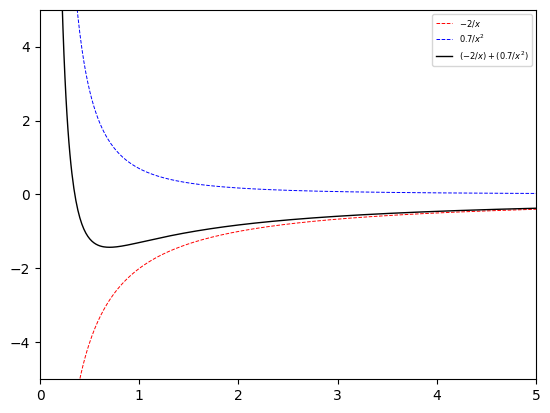

In [50]:
plt.plot(x,y1, ls='--',c='red',lw=0.7, label='${-2}/{x}$')
plt.plot(x,y2,ls='--',c='blue', lw=0.7, label = '$0.7/x^2$')
plt.plot(x,y3,c='black',lw=1, label='$(-2/x)+(0.7/x^2)$')
plt.ylim(-5,5)
plt.xlim(0,5)
plt.legend(fontsize=6)
plt.show()

## OO Interface

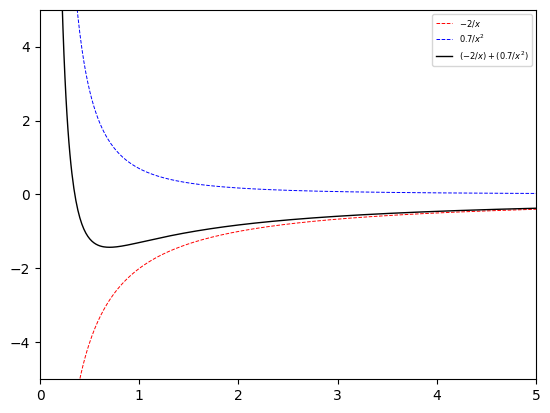

In [59]:
fig,ax = plt.subplots(nrows=1,ncols=1) #creates two things, a figure and a plot
ax.plot(x,y1, ls='--',c='red',lw=0.7, label='${-2}/{x}$')
ax.plot(x,y2,ls='--',c='blue', lw=0.7, label = '$0.7/x^2$')
ax.plot(x,y3,c='black',lw=1, label='$(-2/x)+(0.7/x^2)$')
ax.set_ylim(-5,5)
ax.set_xlim(0,5)
ax.legend(fontsize=6)

As seen above, both have the same output.

# What is OO ax, really?

```ax``` is actually a variable name (which we use because standard) that allows us to work on one set of axis at a time.

The ```plt.subplots``` function allows us to create a grid, and each axis element can be used to plot in one grid. 

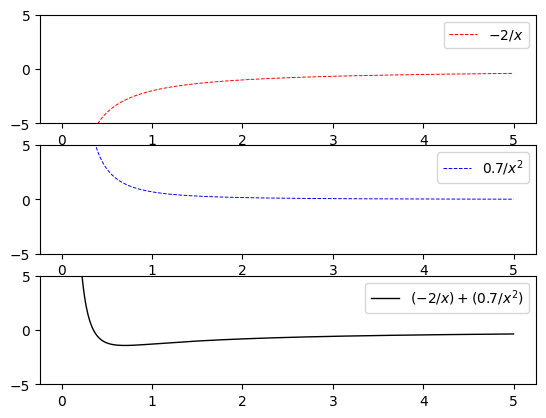

In [62]:
fig,ax = plt.subplots(3,1) #3,1 means 3 row 1 column
#notice how the index is 0 based
ax[0].plot(x,y1, ls='--',c='red',lw=0.7, label='${-2}/{x}$')
ax[0].set_ylim(-5,5)
ax[0].legend()

ax[1].plot(x,y2,ls='--',c='blue', lw=0.7, label = '$0.7/x^2$')
ax[1].set_ylim(-5,5)
ax[1].legend()

ax[2].plot(x,y3,c='black',lw=1, label='$(-2/x)+(0.7/x^2)$')
ax[2].set_ylim(-5,5)
ax[2].legend()

#we have the ability to set stuff for individual subplot

Given how we called the axis, we can see that ```ax``` is a numpy n-dimensional array.

In [63]:
type(ax)

numpy.ndarray

And based on what our rows and columns are, the size will be different. 

In [64]:
ax.shape

(3,)

(2, 5)

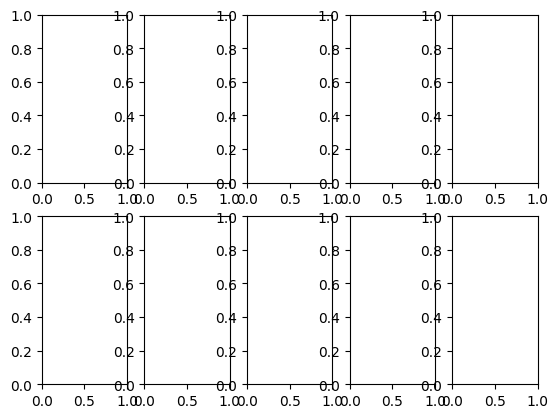

In [66]:
fig1,ax1 = plt.subplots(2,5)
ax1.shape

And as said above, axis is a matplot lib axis,

In [67]:
type(ax[0])

matplotlib.axes._axes.Axes

# A complete OO example

The explanation for each function will be in the comments

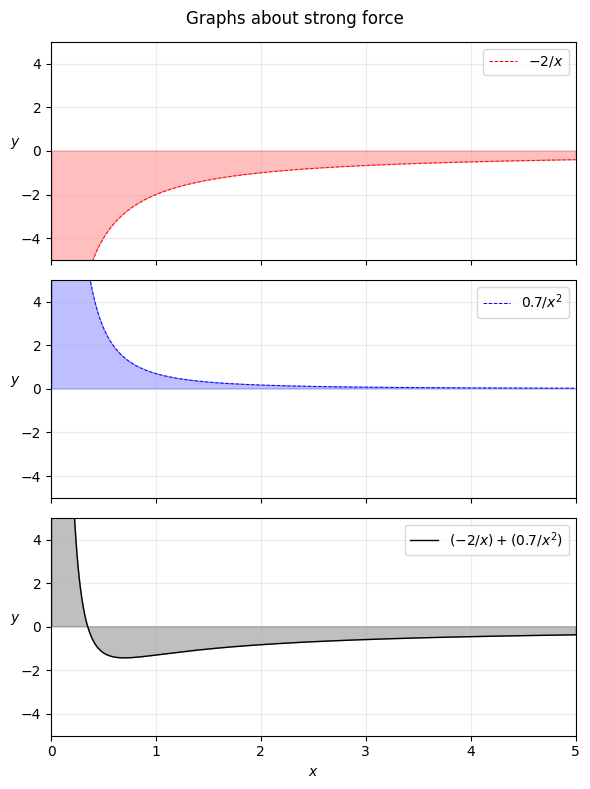

In [91]:
#3,1 means 3 row 1 column. 
#figsize defines the size of the figure
#sharex implies the tick labels of the x axis will be shared and only appear in the bottom most
fig,ax = plt.subplots(3,1,figsize = (6,8),sharex=True)


#we plot the diffent graphs on different axis
ax[0].plot(x,y1, ls='--',c='red',lw=0.7, label='${-2}/{x}$')
#the fill between function will fill up the area between the [axis,start,end] with transparency
ax[0].fill_between(x,0,y1,alpha=.25, color='red')

ax[1].plot(x,y2,ls='--',c='blue', lw=0.7, label = '$0.7/x^2$')
ax[1].fill_between(x,0,y2,alpha=.25, color='blue')

ax[2].plot(x,y3,c='black',lw=1, label='$(-2/x)+(0.7/x^2)$')
ax[2].fill_between(x,y3,alpha=.25, color='black')
ax[2].set_xlabel('$x$')
#x label only here because we want it only at the bottom and not anywhere else

#for things that will be same, we can use a for loop
for a in ax:
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$',rotation=0)
    a.set_ylim(-5,5)
    a.set_xlim(0,5)

#putting a title on top of THE FIGURE
fig.suptitle('Graphs about strong force')


#makes everything clean and properly padded
fig.tight_layout()

The biggest issue is different function name for ```ax``` and ```plt``` (```set_ylim``` vs ```ylim```).

# Multiple rows and columns

\[This is getting a bit too repetitive and boring now :/]

While the website puts the whole code here, I will build up on the code as we go down per section. 

## Using ax

As already looked at above, we know the size of ```ax```. Now we make use of this new thing called ```ax.flatten()``` which is a method of **unpacking** and assigning ```a[0,0]``` and so on to variables that are more easily readible)

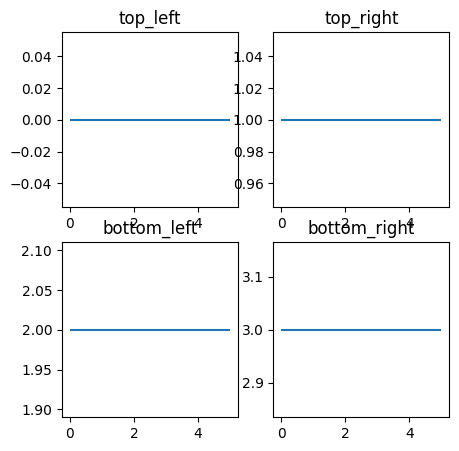

In [98]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5))

#while the following definitely increases the readability of the code, it increases the length a bit too much
top_left, top_right, bottom_left, bottom_right = ax.flatten()

#we also need to add a title and draw those horizontal lines, 
m = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
i=0
for a in ax.flatten():
    a.set_title(m[i])
    a.hlines(y=i,xmin=0,xmax=5)
    i+=1


## Sharing axes

Without sharing any axis, the plots just look like what you see above. Now in the code below, we can take a look at different share options.

**```True``` for both sharex and sharey**

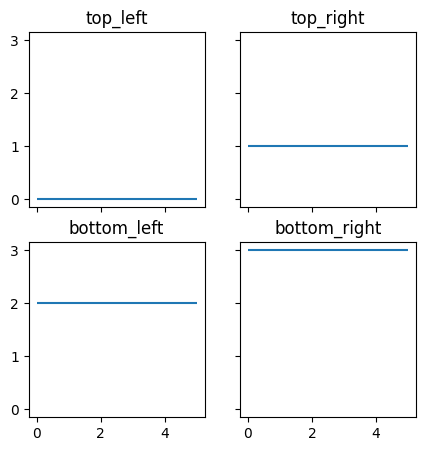

In [99]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5),sharex=True,sharey=True)
top_left, top_right, bottom_left, bottom_right = ax.flatten()
m = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
i=0
for a in ax.flatten():
    a.set_title(m[i])
    a.hlines(y=i,xmin=0,xmax=5)
    i+=1

As seen above, they are both sharing the same x and same y axis now, with the tick labels disappered. 

**```row``` for both sharex and sharey**

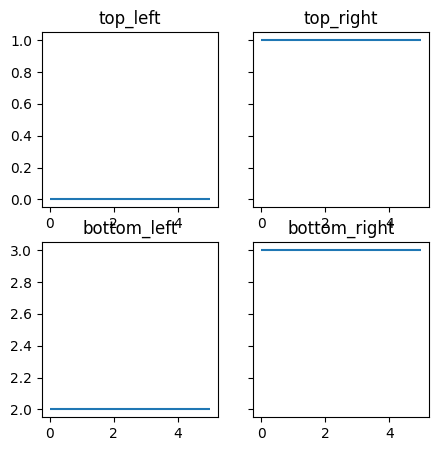

In [102]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5),sharex='row',sharey='row')
top_left, top_right, bottom_left, bottom_right = ax.flatten()
m = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
i=0
for a in ax.flatten():
    a.set_title(m[i])
    a.hlines(y=i,xmin=0,xmax=5)
    i+=1

As you can see now, everything is aligned by the rows and the columns adjust themselves accordingly. 

**```col``` for both sharex and share y**

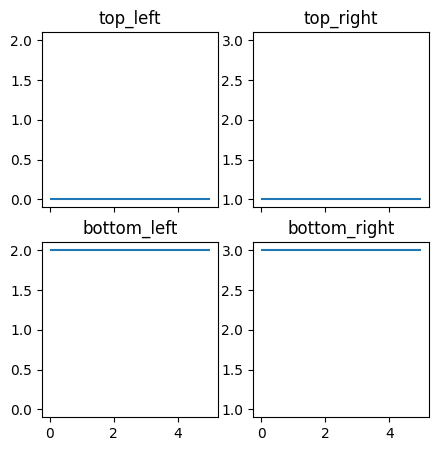

In [104]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5),sharex='col',sharey='col')
top_left, top_right, bottom_left, bottom_right = ax.flatten()
m = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
i=0
for a in ax.flatten():
    a.set_title(m[i])
    a.hlines(y=i,xmin=0,xmax=5)
    i+=1

As seen above now, everything is aligned by the columns. 

**Mix of both**

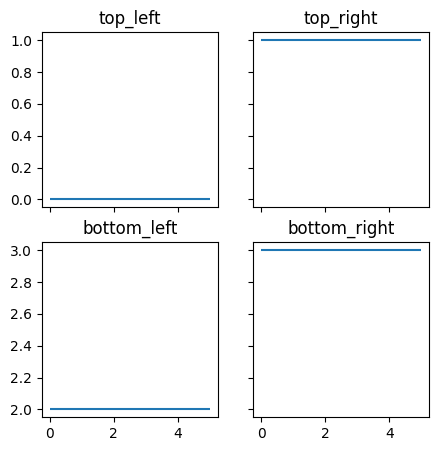

In [105]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5),sharex='col',sharey='row')
top_left, top_right, bottom_left, bottom_right = ax.flatten()
m = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
i=0
for a in ax.flatten():
    a.set_title(m[i])
    a.hlines(y=i,xmin=0,xmax=5)
    i+=1

## Accessing all axes

Use for loops for life, 

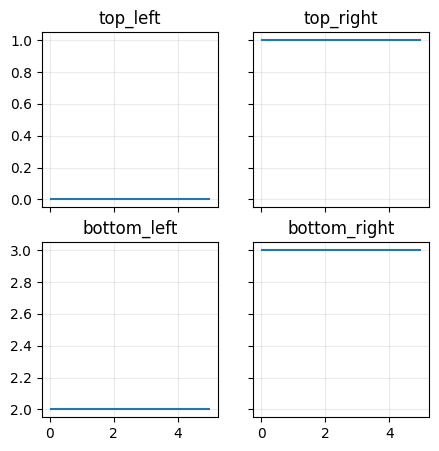

In [107]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(5, 5),sharex='col',sharey='row')
top_left, top_right, bottom_left, bottom_right = ax.flatten()
m = ['top_left', 'top_right', 'bottom_left', 'bottom_right']
i=0
for a in ax.flatten():
    a.grid(alpha=.25)
    a.set_title(m[i])
    a.hlines(y=i,xmin=0,xmax=5)
    i+=1

# Other useful plots

## Histograms

### Data

I will not use my own data here and just use dr chammikka's data. I will also not make too many changes.

### A quick helper function

This is to get the data

In [108]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

Its a cool thing that has bars, and better than a bar graph. 

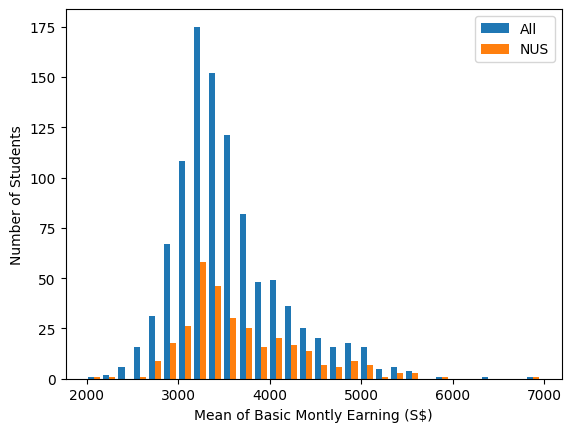

In [111]:
plt.style.use('default')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=30, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## Scatter plots

These are my favourite kind of graphs. You can never go wrong with a scatter plot.

Text(0, 0.5, 'random y')

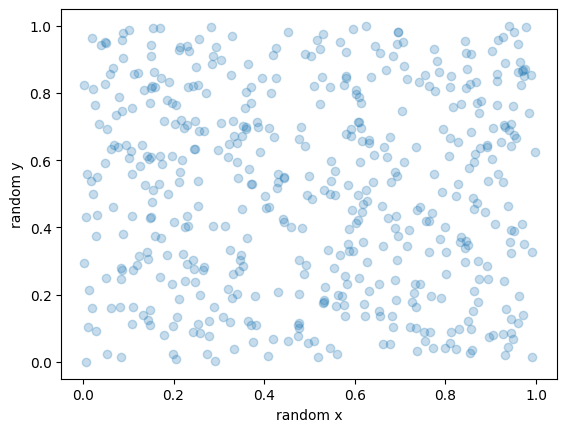

In [118]:
x=np.random.rand(500,1)
y=np.random.rand(500,1)
plt.scatter(x,y,alpha=.25)
plt.xlabel('random x')
plt.ylabel('random y')

Don't they just look absolutely pristine. 

## Bar charts

In [120]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

Text(0, 0.5, 'Number of Students')

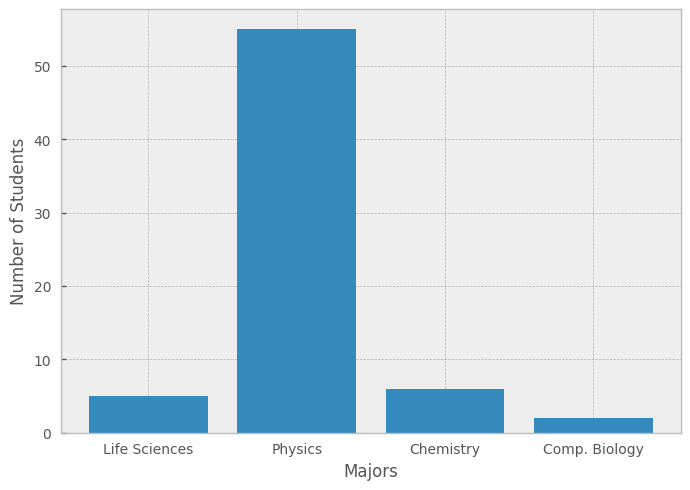

In [131]:
# i will be lazy and just copy dr chammika's code here
student_numbers = {'Life Sciences': 5,
                   'Physics': 55,
                   'Chemistry': 6,
                   'Comp. Biology': 2}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('bmh')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

Text(0, 0.5, 'Number of Students')

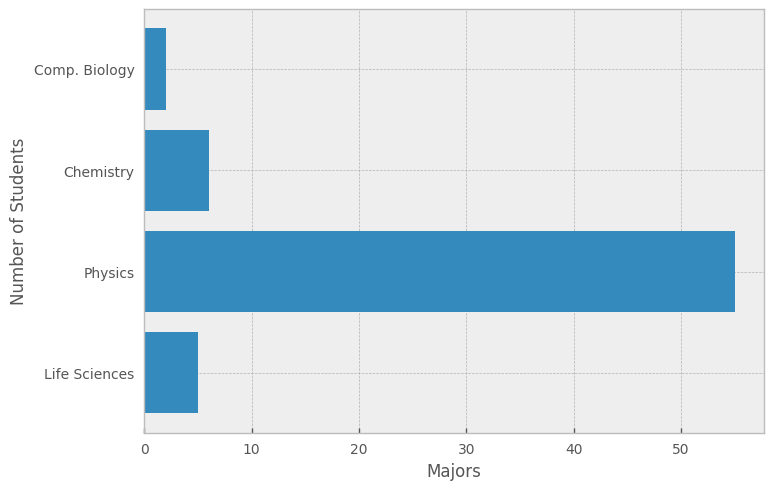

In [132]:
#the same thing but horizontal
plt.style.use('bmh')
plt.barh(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## Pie charts

Worse kind of charts

Text(0.5, 1.0, 'Percentage of each major')

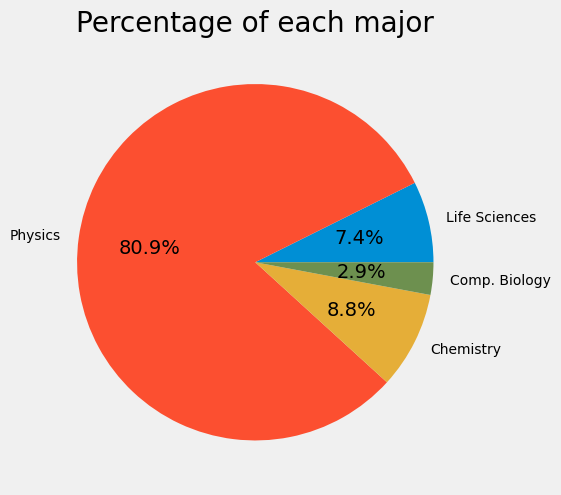

In [134]:
plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   
        startangle=0                
        )
plt.title('Percentage of each major')